# 1. Chain-of-Thought (CoT) Prompting

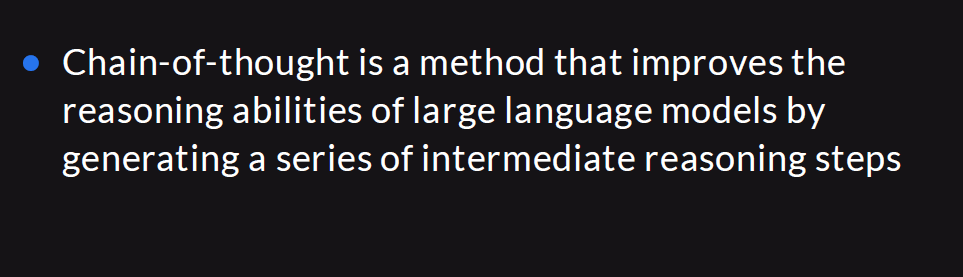

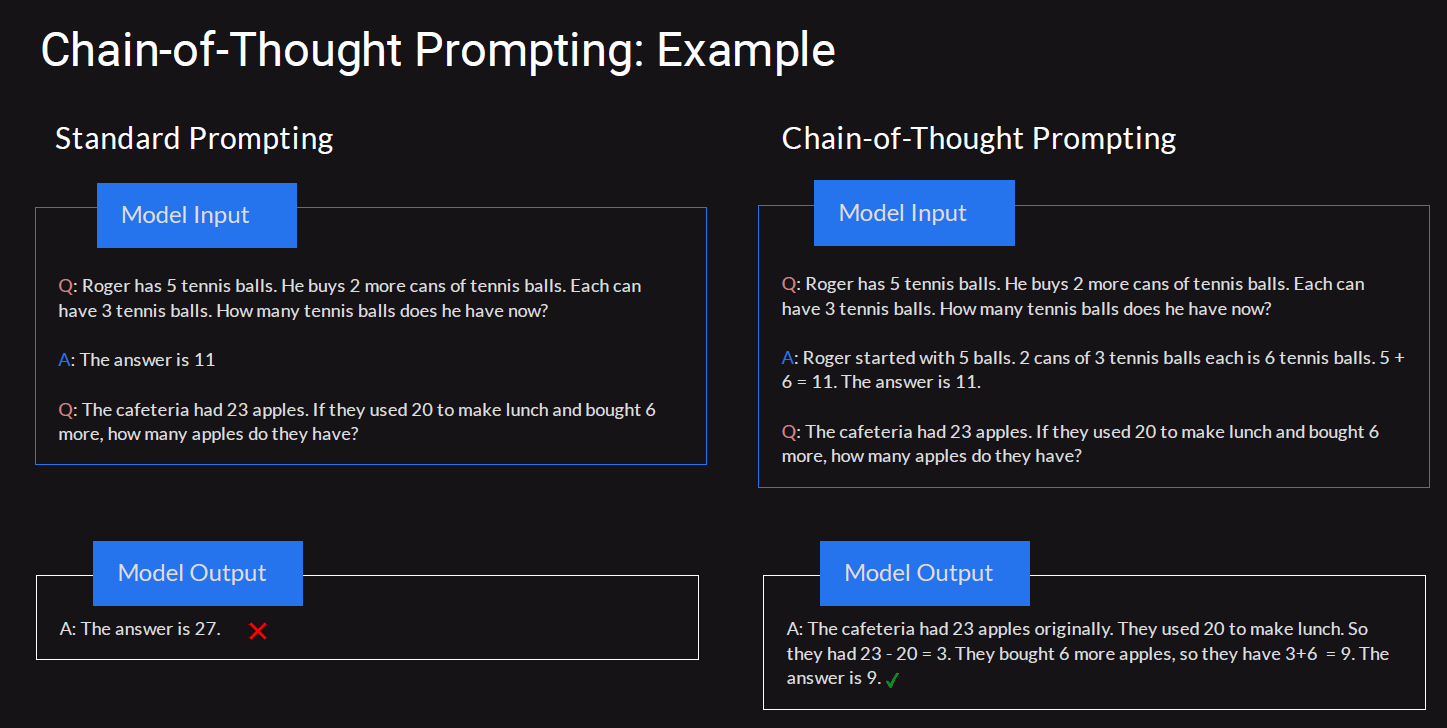

In [1]:
import openai

# Set up your OpenAI API key
f = open('.openai_api_key.txt')

openai.api_key = f.read()

In [2]:
def chain_of_thought_prompt(question):
    # Prompt that encourages step-by-step reasoning
    messages = [
        {"role": "system", "content": "You are a helpful assistant that explains your reasoning step by step."},
        {"role": "user", "content": f"Question: {question}\nAnswer the question step by step."}
    ]

    # Generate the response from the chat model
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # You can also use "gpt-4/gpt-4o-mini" if you have access
        messages=messages,
        max_tokens=150,
        temperature=0.9
    )

    # Extract the answer from the response
    answer = response['choices'][0]['message']['content'].strip()
    return answer

In [3]:
# Example usage
question = "If a train travels 60 miles per hour for 2 hours and then 40 miles per hour for another 2 hours, how far does it travel in total?"
answer = chain_of_thought_prompt(question)
print("Answer:", answer)

Answer: Step 1: Calculate the distance traveled at 60 miles per hour for 2 hours.  
Distance = Speed x Time  
Distance = 60 miles/hour x 2 hours = 120 miles

Step 2: Calculate the distance traveled at 40 miles per hour for 2 hours.  
Distance = Speed x Time  
Distance = 40 miles/hour x 2 hours = 80 miles

Step 3: Add the distances traveled at 60 mph and 40 mph to find the total distance traveled.  
Total Distance = 120 miles + 80 miles = 200 miles

Therefore, the train travels a total of 200 miles.


# 2. ReAct (Reasoning and Acting)

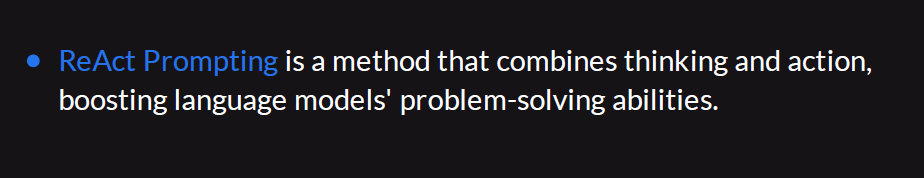

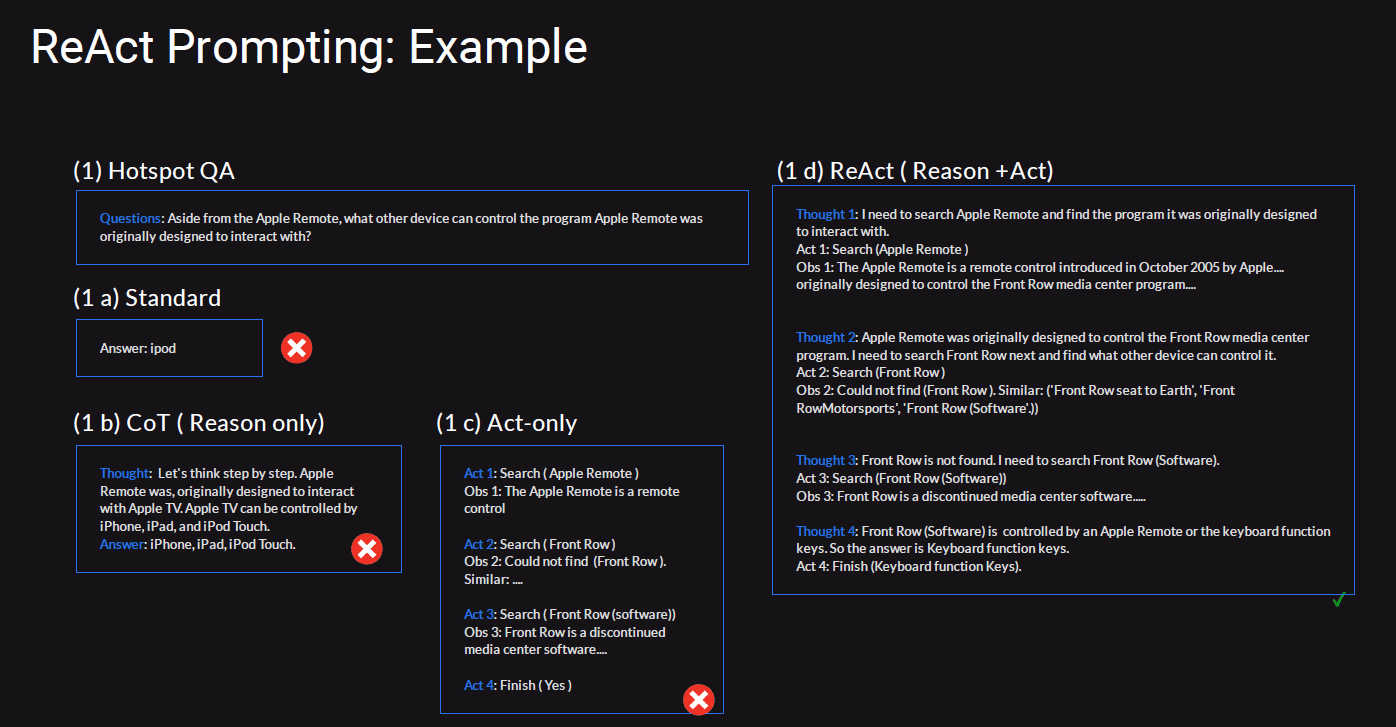

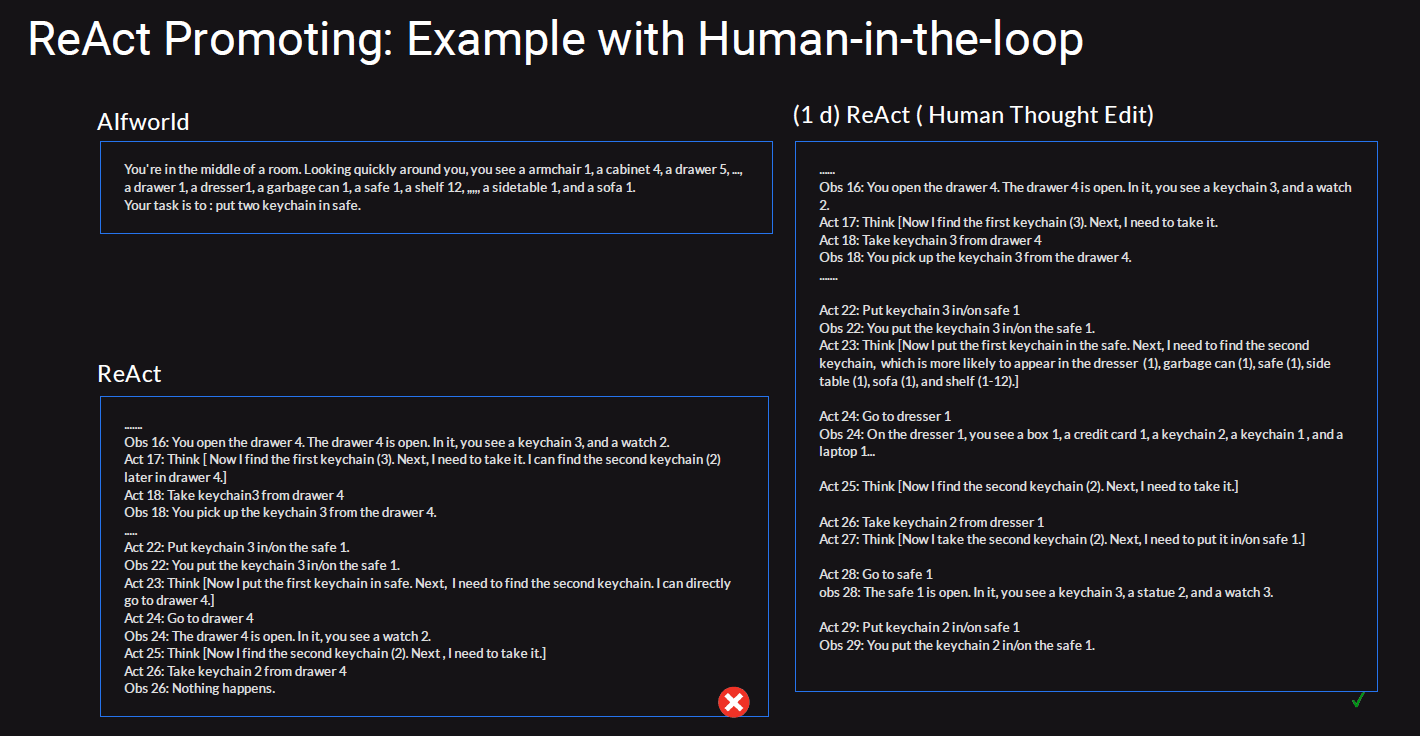

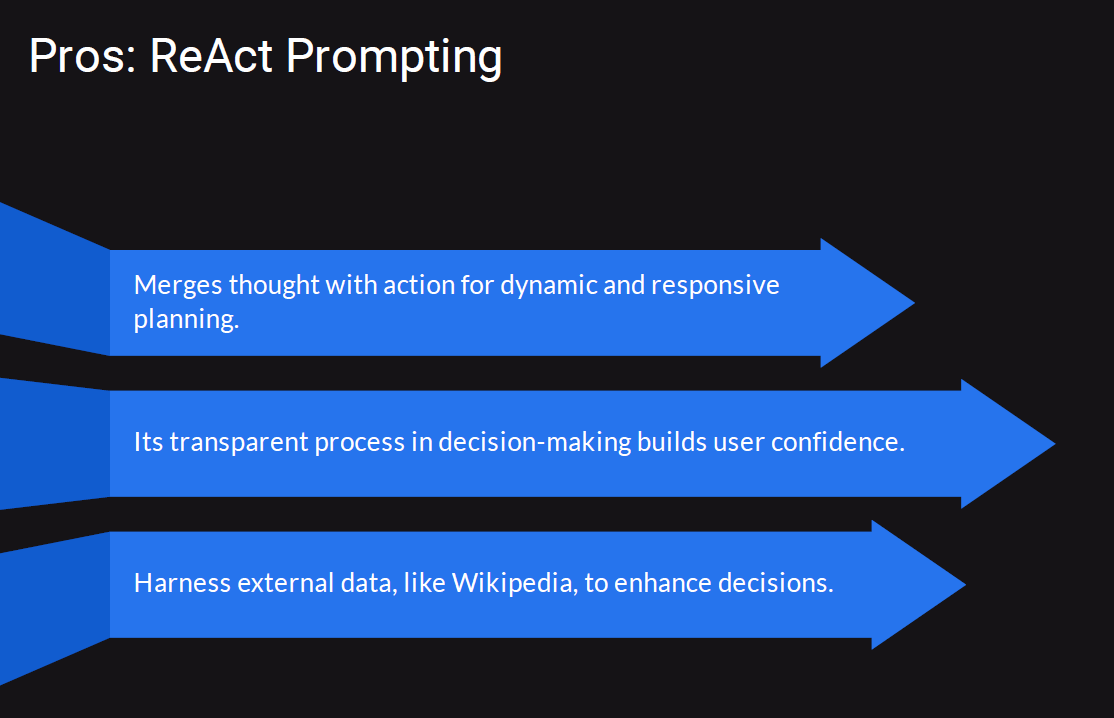

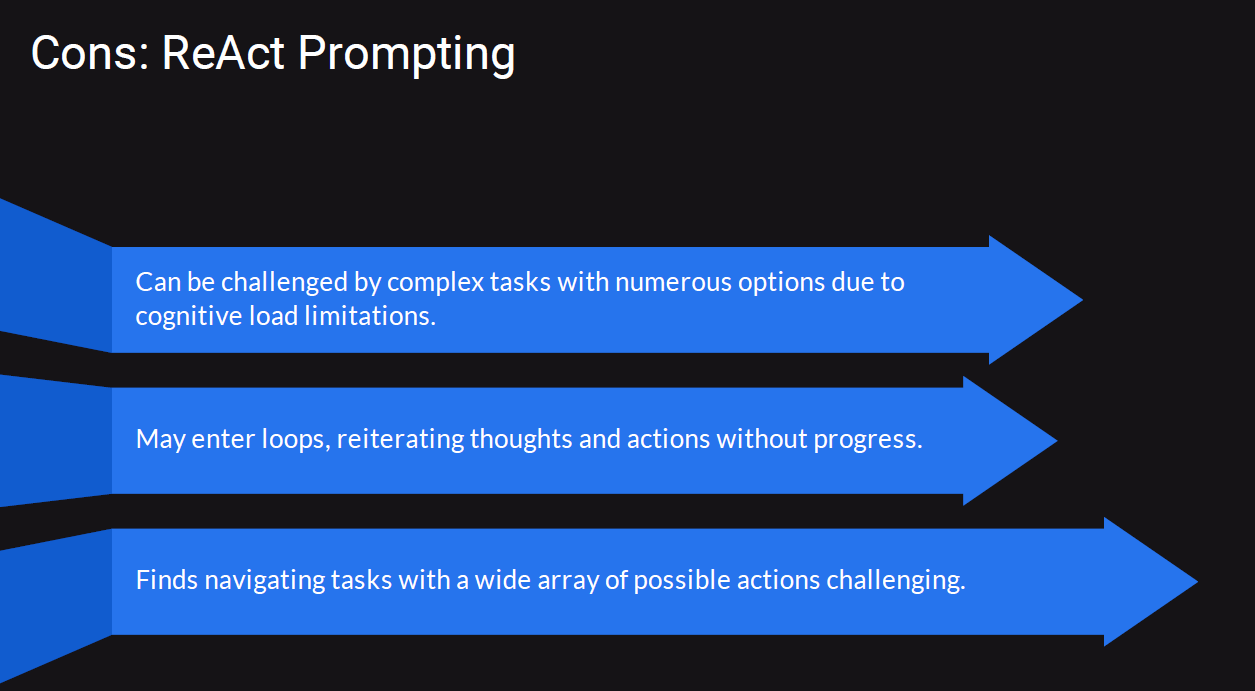

In [4]:
import openai

# Set up your OpenAI API key
f = open('.openai_api_key.txt')

openai.api_key = f.read()



In [5]:
def react_agent_prompt(task):
    # Initial prompt with instructions for ReAct approach
    messages = [
        {"role": "system", "content": "You are a helpful assistant that reasons step by step and takes actions as needed."},
        {"role": "user", "content": f"Task: {task}\nLet's reason through the task step by step and take actions when needed.\nReasoning:"}
    ]

    # Generate the response from the chat model for reasoning
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # Use GPT-3.5-turbo or GPT-4 if you have access
        messages=messages,
        max_tokens=150,
        temperature=0.9
    )

    # Extract the reasoning step from the response
    reasoning = response['choices'][0]['message']['content'].strip()

    # Now, simulate an "action" based on the reasoning
    action_prompt = [
        {"role": "system", "content": "You are a helpful assistant that reasons step by step and takes actions as needed."},
        {"role": "user", "content": f"Task: {task}"},
        {"role": "assistant", "content": reasoning},
        {"role": "user", "content": "Action:"}
    ]

    # Generate the response from the chat model for the action
    action_response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=action_prompt,
        max_tokens=50,
        temperature=0.9
    )

    # Extract the action step
    action = action_response['choices'][0]['message']['content'].strip()

    # Combine reasoning and action results
    result = f"Reasoning: {reasoning}\nAction: {action}"
    return result


In [6]:
# Example usage
task = "Calculate the total distance traveled if a car drives 50 miles at 30 mph, stops for 1 hour, and then drives another 100 miles at 60 mph."
result = react_agent_prompt(task)
print("Result:", result)

Result: Reasoning: Step 1: Calculate the distance traveled during the first leg of the trip when the car drives 50 miles at 30 mph.

To find the time taken for the first leg of the trip, we can use the formula: time = distance / speed.
Time taken for the first leg = 50 miles / 30 mph = 5/3 hours.

Step 2: Calculate the distance traveled during the second leg of the trip when the car drives 100 miles at 60 mph.

To find the time taken for the second leg of the trip, we can use the formula: time = distance / speed.
Time taken for the second leg = 100 miles / 60 mph = 5/3 hours.

Step 3:
Action: Calculate the total distance traveled by adding the distances traveled during the two legs of the trip.
